## Load Libraries

In [1]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 67.6 MB/s eta 0:00:00 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 791.2/791.2 kB 14.6 MB/s eta 0:00:000:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
#from fbprophet import Prophet
from prophet import Prophet

## Load Data



In [2]:
df = pd.read_csv('./BeerWineLiquor.csv')

In [3]:
df.head(20)

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
5,6/1/1992,1775
6,7/1/1992,1912
7,8/1/1992,1862
8,9/1/1992,1770
9,10/1/1992,1882


In [4]:
df.tail()

,date,beer
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


In [5]:
df.describe()


,beer
count,324.000000
mean,2972.895062
std,1010.218574
min,1501.000000
25%,2109.000000
50%,2791.000000
75%,3627.250000
max,6370.000000


<Axes: >

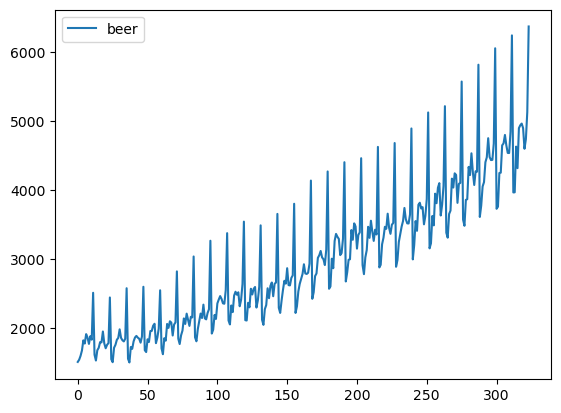

In [6]:
df.plot()

### Format the Data

In [7]:
df.columns = ['ds','y']

In [8]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
...,...,...
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130


## Create and Fit Model

In [10]:
m = Prophet()
m.fit(df)

16:29:42 - cmdstanpy - INFO - Chain [1] start processing
16:29:42 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
m

## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados



In [30]:
future = m.make_future_dataframe(periods=100,freq = 'MS')

In [31]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [32]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [33]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [34]:
future.tail()

,ds
419,2026-12-01
420,2027-01-01
421,2027-02-01
422,2027-03-01
423,2027-04-01



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [35]:
forecast = m.predict(future)

In [36]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1992-01-01,1778.97538,1412.113184,1580.366593,1778.97538,1778.97538,-0.159140,-0.159140,-0.159140,-0.159140,-0.159140,-0.159140,0.0,0.0,0.0,1495.868783
1,1992-02-01,1781.01054,1434.349372,1616.281724,1781.01054,1781.01054,-0.144106,-0.144106,-0.144106,-0.144106,-0.144106,-0.144106,0.0,0.0,0.0,1524.357033
2,1992-03-01,1782.91440,1591.850877,1764.407589,1782.91440,1782.91440,-0.060583,-0.060583,-0.060583,-0.060583,-0.060583,-0.060583,0.0,0.0,0.0,1674.900940
3,1992-04-01,1784.94956,1582.309129,1754.789472,1784.94956,1784.94956,-0.066066,-0.066066,-0.066066,-0.066066,-0.066066,-0.066066,0.0,0.0,0.0,1667.024944
4,1992-05-01,1786.91907,1734.312362,1909.675482,1786.91907,1786.91907,0.018653,0.018653,0.018653,0.018653,0.018653,0.018653,0.0,0.0,0.0,1820.249721


In [37]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
419,2026-12-01,6349.500522,8184.132696,9082.575386,6032.158704,6679.029071,0.358356,0.358356,0.358356,0.358356,0.358356,0.358356,0.0,0.0,0.0,8624.881175
420,2027-01-01,6365.253239,5072.760910,5651.342905,6040.219475,6696.961065,-0.157196,-0.157196,-0.157196,-0.157196,-0.157196,-0.157196,0.0,0.0,0.0,5364.659013
421,2027-02-01,6381.005955,5127.876591,5713.360390,6049.008129,6718.963507,-0.150621,-0.150621,-0.150621,-0.150621,-0.150621,-0.150621,0.0,0.0,0.0,5419.892146
422,2027-03-01,6395.234215,5642.352682,6291.531880,6058.643241,6741.795638,-0.068593,-0.068593,-0.068593,-0.068593,-0.068593,-0.068593,0.0,0.0,0.0,5956.564553
423,2027-04-01,6410.986932,5608.753735,6279.049483,6069.445389,6759.764200,-0.072006,-0.072006,-0.072006,-0.072006,-0.072006,-0.072006,0.0,0.0,0.0,5949.357914


In [38]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yhat'],
      dtype='object')

In [39]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
412,2026-05-01,6348.852655,6043.342574,6647.302100
413,2026-06-01,6302.086220,5991.048666,6614.413206
414,2026-07-01,6572.878385,6248.865947,6897.469747
415,2026-08-01,6381.791912,6076.483192,6698.356151
416,2026-09-01,6055.798055,5757.787540,6359.636175
417,2026-10-01,6232.929805,5905.432266,6560.914775
418,2026-11-01,6461.242584,6134.522008,6817.324587
419,2026-12-01,8624.881175,8184.132696,9082.575386
420,2027-01-01,5364.659013,5072.760910,5651.342905
421,2027-02-01,5419.892146,5127.876591,5713.360390


### Graficando los pronósticos


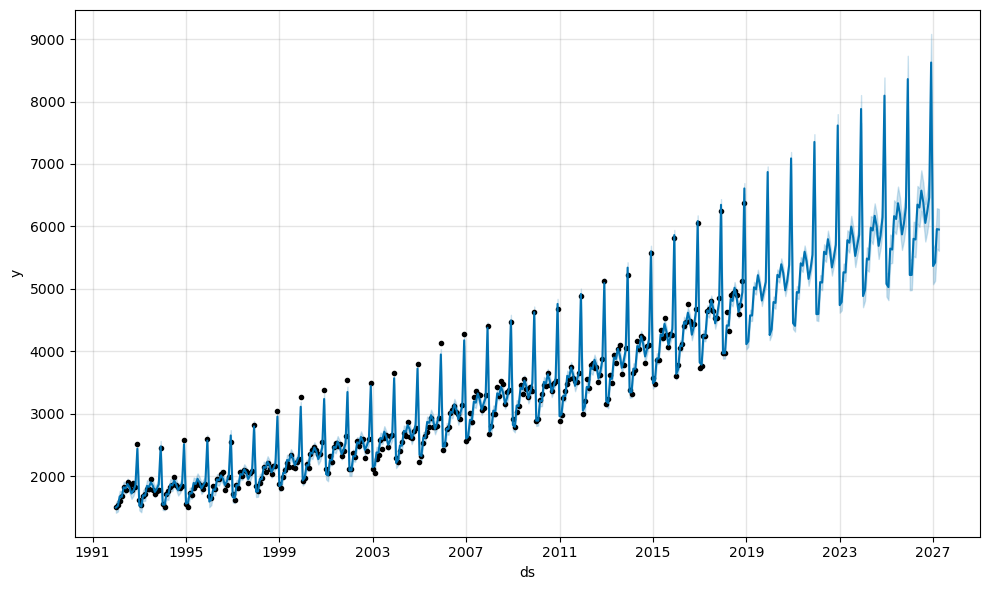

In [40]:
m.plot(forecast);

In [41]:
pd.plotting.register_matplotlib_converters()

(16071.0, 18993.0)

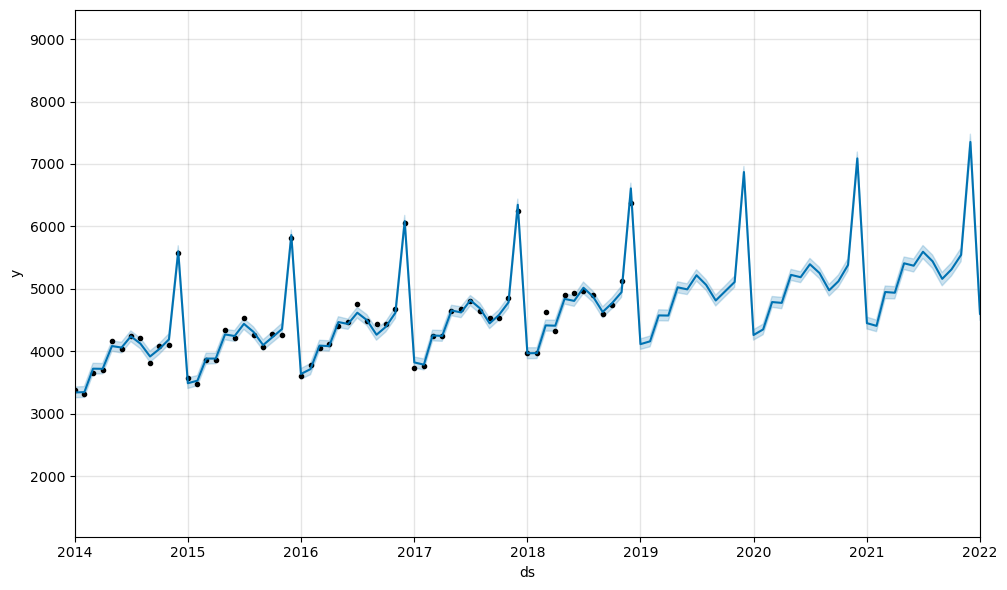

In [42]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

<Axes: xlabel='ds'>

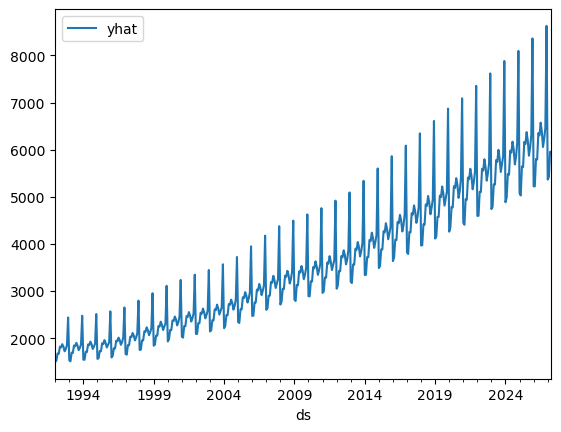

In [43]:
forecast.plot(x='ds',y='yhat')

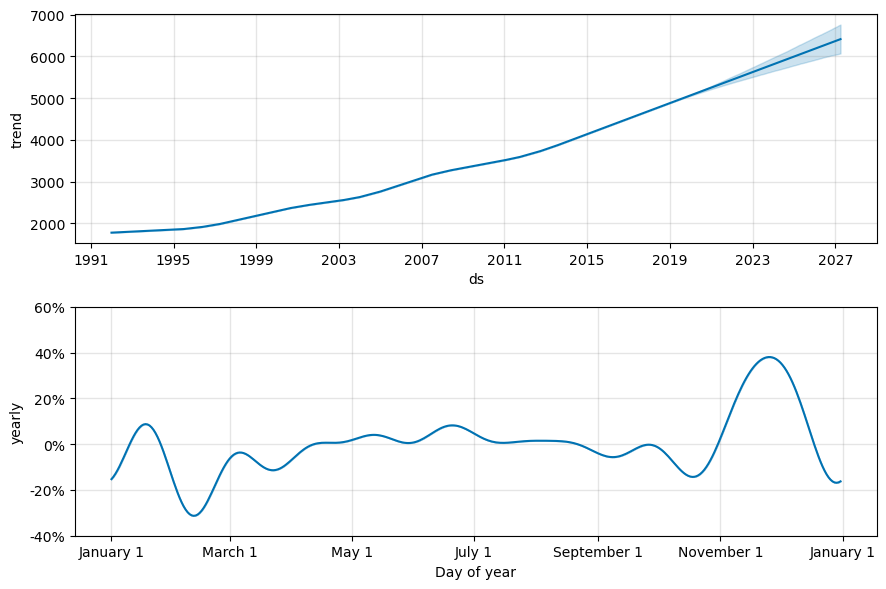

In [44]:
m.plot_components(forecast);


16:35:56 - cmdstanpy - INFO - Chain [1] start processing
16:35:56 - cmdstanpy - INFO - Chain [1] done processing


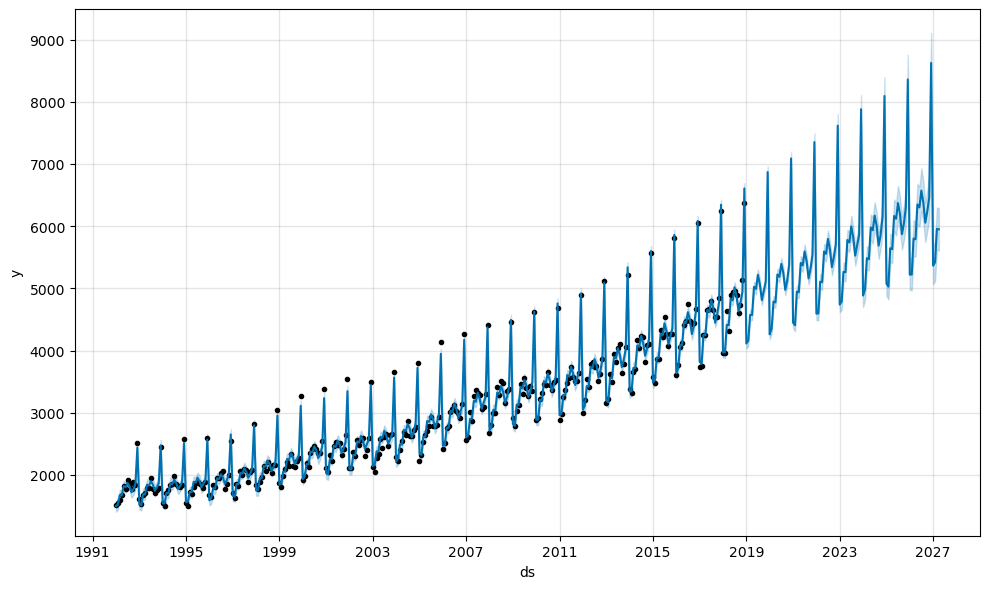

In [45]:
# Prophet tiene muchos parametros - es clave ajustarlos bien y conocerlos para no acabar con los valores por defecto

m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

In [46]:
forecast[['ds', 'yhat']].tail(24)

,ds,yhat
400,2025-05-01,6164.161548
401,2025-06-01,6118.183118
402,2025-07-01,6370.852035
403,2025-08-01,6193.695835
404,2025-09-01,5871.583892
405,2025-10-01,6041.990537
406,2025-11-01,6304.980442
407,2025-12-01,8359.276820
408,2026-01-01,5221.403071
409,2026-02-01,5222.255435
